#Comparing HSV and RGB in their capacity to produce consistant image masks
##I will be trying to select only the yellow balls using both approaches

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load in image for comparison
image = cv2.imread('ballpit.jpg')

img_original = np.copy(image)
imgRGB = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)

##Display color channels for RGB and HSV for comparison

In [ ]:
# Display each channel of RGB image

redChannel = imgRGB[:, :, 0]
greenChannel = imgRGB[:, :, 1]
blueChannel = imgRGB[:, :, 2]

f, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(10, 25))

axes1.imshow(redChannel, cmap='gray')
axes2.imshow(greenChannel, cmap='gray')
axes3.imshow(blueChannel, cmap='gray')

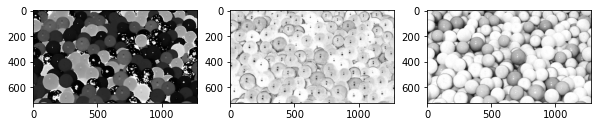

In [44]:
# Display each channel of HSV image
imgHSV = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)

hueChannel = imgHSV[:, :, 0]
satChannel = imgHSV[:, :, 1]
valChannel = imgHSV[:, :, 2]

f, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(10, 25))


axes1.imshow(hueChannel, cmap='gray')
axes2.imshow(satChannel, cmap='gray')
axes3.imshow(valChannel, cmap='gray')

##Create the masks so that only yellow comes through

In [ ]:
# Create mask using RGB

# Set threshold to select the yellow in image
lowerRGB = np.array([100,150,0])
higherRGB = np.array([255,255,10])

maskRGB = cv2.inRange(imgRGB, lowerRGB, higherRGB)

maskedImage = np.copy(imgRGB)
maskedImage[maskRGB == 0] = [0, 0, 0]

plt.imshow(maskedImage)

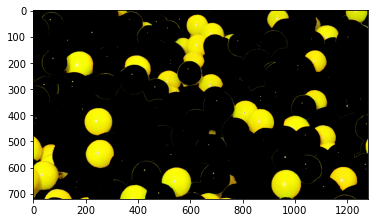

In [61]:
# Create mask using HSV

# Make a HSV copy
imgHSV = np.copy(imgRGB)
imgHSV = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)

# Set threshold to select the yellow in image
lowerHSV = np.array([20, 0, 0])
higherHSV = np.array([35,255,255])

maskHSV = cv2.inRange(imgHSV, lowerHSV, higherHSV)

maskedImage = np.copy(imgRGB)
maskedImage[maskHSV == 0] = [0, 0, 0]

plt.imshow(maskedImage)

###It is much easier to isolate hue using HSV than it is RGB since all color information in HSV is isolated to one channel, whereas they are spread out over 3 channels in RGB. Moreover, shading and saturation is combined with hue in RGB.